# This notebook is for Task 5 only

Improvements Task 5:
- Refer to whatsapp
- Composite of multi views/plots:
    + One is the height histogram 
    + One is the overall histogram (slidable)
    + Filter by dropdown country / region
    + Dropdown affects height and overall, overall also affects height
- Limit number of countries per region

In [5]:
# imports
import altair as alt
import pandas as pd
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

# user defined modules
from helpers import preprocessing


In [6]:
# helper function
def get_data(data_path, preprocess=False):
    data = pd.read_csv(data_path)
    if preprocess is True:
        fifa_subset = preprocessing(data)
        america_subset = fifa_subset[fifa_subset["region"] == "America"]
        countries_counts = america_subset.country.value_counts().to_frame(name="count").reset_index().rename(columns={"index": "country"})
        countries_interests = countries_counts.query('count > 225').country.tolist()
        countries_subset = america_subset[america_subset.country.isin(countries_interests)]
        # store to data
        data = countries_subset
    return data

In [7]:
# read data here
data_path = "data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
subset = get_data(data_path, preprocess=True)

> 5. Find the range of height that has the best average overall ranking by country 
>
>    (how to phrase this but just finding the best height for performance) (interactive)

To accomplish this:
- One plot of `overall histogram` that could brushed to serve as slider
- One plot of `height counts`, linked with `overall histogram`

In [13]:
# slider
brush = alt.selection_interval(
    encodings=["x"],
    resolve="intersect"
)

In [15]:
# histogram for height and overall
base_hist = alt.Chart(subset).mark_bar().encode(
    x = alt.X(alt.repeat("row"), type="quantitative",
              bin=alt.Bin(maxbins=100, minstep=1)
             ),
    y = alt.Y('count():Q', title=None)
    
)

# adding these by layers and render it
ovr_height_hist = alt.layer(
    base_hist.add_selection(brush).encode(
        color=alt.value('lightgrey')
    ),
    base_hist.transform_filter(brush)
).properties(
    width=900,
    height=100
).repeat(
    row=['overall', 'height'],
    data=subset
).configure_view(
    stroke='transparent' # no outline
)


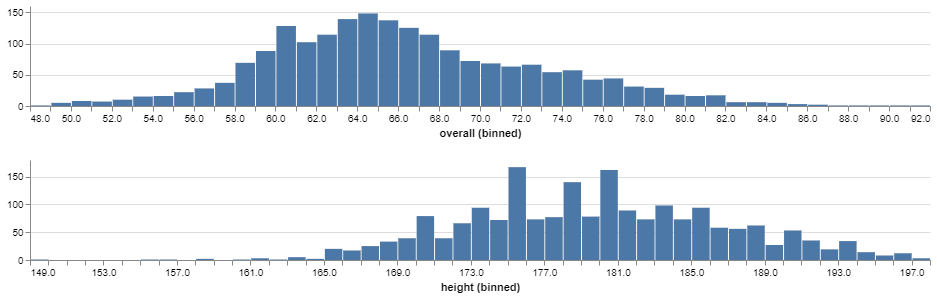

In [16]:
ovr_height_hist